# 保序回归 Isotonic Regression

举个栗子说明：

一般从元素的首元素向后观察，如果出现乱序现象停止观察，并从乱序元素开始逐个吸收元素组成一个序列，直达该序列所有元素的平均值小于或是等于下一个待吸收的元素。

1，未发现乱序正常读取

原始序列：<9, 10, 14>

结果序列：<9, 10, 14>

分析：从9往后观察，到最后的元素14都未发现乱序情况，不用处理。

2，发现乱序，平均值大于后面小于前面

原始序列：<9, 14, 10>

结果序列：<9, 12, 12>

分析：从9往后观察，观察到14时发生乱序（14>10），停止该轮观察转入吸收元素处理，吸收元素10后子序列为<14, 10>，取该序列所有元素的平均值得12，故用序列<12, 12>替代<14, 10>。吸收10后已经到了最后的元素，处理操作完成。

3，发现乱序，平均值大于后面，大于前面

原始序列：<14, 9, 10, 15>

结果序列：<11, 11, 11, 15>

分析：从14往后观察，观察到9时发生乱序（14>9），停止该轮观察转入吸收元素处理，吸收元素9后子序列为<14,9>。求该序列所有元素的平均值得12.5，由于12.5大于下个待吸收的元素10，所以再吸收10，得序列<14, 9, 10>。
求该序列所有元素的平均值得11，由于11小于下个待吸收的元素15，所以停止吸收操作，用序列<11, 11, 11>替代<14, 9, 10>。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

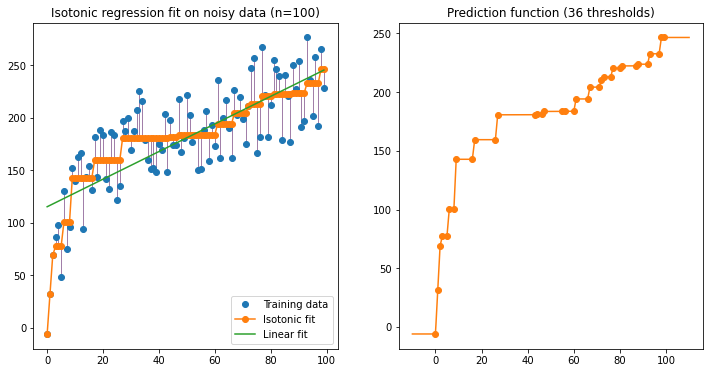

In [2]:
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

# Fit IsotonicRegression and LinearRegression models:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression


segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, 'C0.', markersize=12)
ax0.plot(x, y_, 'C1.-', markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), 'C2-')
ax0.add_collection(lc)
ax0.legend(('Training data', 'Isotonic fit', 'Linear fit'), loc='lower right')
ax0.set_title('Isotonic regression fit on noisy data (n=%d)' % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), 'C1-')
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, 'C1.', markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))

plt.show()